In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# Preprocessing

In [2]:
# read data
data = pd.read_excel('Hospital - Data.xlsx', 'Data', index_col=None)
# get rid of needless symbols
data.columns = data.columns.str.strip()
data.columns = data.columns.str.replace(".","")
data.columns = data.columns.str.replace(" ","_")
data.columns = data.columns.str.replace("-","_")
data.columns = data.columns.str.replace("___","_")
data.columns = data.columns.str.replace("__","_")
data.head()

,SL,AGE,GENDER,MARITAL_STATUS,KEY_COMPLAINTS_CODE,BODY_WEIGHT,BODY_HEIGHT,HR_PULSE,BP_HIGH,BP_LOW,...,CREATININE,MODE_OF_ARRIVAL,STATE_AT_THE_TIME_OF_ARRIVAL,TYPE_OF_ADMSN,TOTAL_LENGTH_OF_STAY,LENGTH_OF_STAY_ICU,LENGTH_OF_STAY_WARD,IMPLANT_USED_(Y/N),COST_OF_IMPLANT,TOTAL_COST_TO_HOSPITAL
0,1,58.0,M,MARRIED,other- heart,49.2,160,118,100.0,80.0,...,0.8,AMBULANCE,ALERT,EMERGENCY,25,12,13,Y,38000,660293.0
1,2,59.0,M,MARRIED,CAD-DVD,41.0,155,78,70.0,50.0,...,1.7,AMBULANCE,ALERT,EMERGENCY,41,20,21,Y,39690,809130.0
2,3,82.0,M,MARRIED,CAD-TVD,46.6,164,100,110.0,80.0,...,0.8,WALKED IN,ALERT,ELECTIVE,18,9,9,N,0,362231.0
3,4,46.0,M,MARRIED,CAD-DVD,80.0,173,122,110.0,80.0,...,1.5,AMBULANCE,ALERT,EMERGENCY,14,13,1,Y,89450,629990.0
4,5,60.0,M,MARRIED,CAD-DVD,58.0,175,72,180.0,100.0,...,1.9,AMBULANCE,ALERT,EMERGENCY,24,12,12,N,0,444876.0


In [3]:
# delete the counting and obviously unconclusive columns 
# while other possible multycolllinearity will be abandened by regularization
del data['SL']
del data['IMPLANT_USED_(Y/N)']
del data['TOTAL_LENGTH_OF_STAY']

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 21 columns):
AGE                             248 non-null float64
GENDER                          248 non-null object
MARITAL_STATUS                  248 non-null object
KEY_COMPLAINTS_CODE             212 non-null object
BODY_WEIGHT                     248 non-null float64
BODY_HEIGHT                     248 non-null int64
HR_PULSE                        248 non-null int64
BP_HIGH                         225 non-null float64
BP_LOW                          225 non-null float64
RR                              248 non-null int64
PAST_MEDICAL_HISTORY_CODE       75 non-null object
HB                              246 non-null float64
UREA                            235 non-null float64
CREATININE                      215 non-null float64
MODE_OF_ARRIVAL                 248 non-null object
STATE_AT_THE_TIME_OF_ARRIVAL    248 non-null object
TYPE_OF_ADMSN                   248 non-null object
LENGTH_O

In [5]:
# Descriptive Statistics of numerical data
data.describe()

,AGE,BODY_WEIGHT,BODY_HEIGHT,HR_PULSE,BP_HIGH,BP_LOW,RR,HB,UREA,CREATININE,LENGTH_OF_STAY_ICU,LENGTH_OF_STAY_WARD,COST_OF_IMPLANT,TOTAL_COST_TO_HOSPITAL
count,248.000000,248.000000,248.000000,248.000000,225.000000,225.000000,248.000000,246.000000,235.000000,215.000000,248.000000,248.000000,248.000000,248.000000
mean,28.879837,37.524677,130.221774,92.229839,115.022222,71.875556,23.540323,12.894553,26.581702,0.746977,3.475806,8.153226,8544.201613,198723.330282
std,25.899359,23.118822,39.170901,20.308740,22.536368,15.313176,3.840756,3.083237,15.998367,0.548641,3.853520,3.755793,21521.877503,122587.492984
min,0.032877,2.020000,19.000000,41.000000,70.000000,39.000000,12.000000,5.000000,2.000000,0.100000,0.000000,0.000000,0.000000,46093.000000
25%,6.000000,15.000000,105.000000,78.000000,100.000000,60.000000,22.000000,11.300000,18.000000,0.300000,1.000000,6.000000,0.000000,131652.750000
50%,15.500000,40.900000,147.500000,90.000000,110.000000,70.000000,24.000000,12.350000,22.000000,0.700000,2.000000,7.000000,0.000000,162660.500000
75%,55.000000,58.250000,160.000000,104.000000,130.000000,80.000000,24.000000,14.000000,30.000000,1.000000,4.000000,10.000000,0.000000,220614.000000
max,88.000000,85.000000,185.000000,155.000000,215.000000,140.000000,42.000000,25.700000,143.000000,5.200000,30.000000,22.000000,196848.000000,887350.000000


In [6]:
# Correlation of numerical data with labels
data[data.columns[:-1]].corrwith(data['TOTAL_COST_TO_HOSPITAL'])

AGE                    0.420697
BODY_WEIGHT            0.348270
BODY_HEIGHT            0.293828
HR_PULSE              -0.008536
BP_HIGH                0.182876
BP_LOW                 0.158195
RR                     0.016181
HB                    -0.061601
UREA                   0.276581
CREATININE             0.377611
LENGTH_OF_STAY_ICU     0.821995
LENGTH_OF_STAY_WARD    0.160676
COST_OF_IMPLANT        0.483825
dtype: float64

In [7]:
# Correlation matrix of numerical data
data[data.columns].corr()

,AGE,BODY_WEIGHT,BODY_HEIGHT,HR_PULSE,BP_HIGH,BP_LOW,RR,HB,UREA,CREATININE,LENGTH_OF_STAY_ICU,LENGTH_OF_STAY_WARD,COST_OF_IMPLANT,TOTAL_COST_TO_HOSPITAL
AGE,1.000000,0.848397,0.717492,-0.483498,0.608032,0.468121,-0.284377,-0.132305,0.231687,0.602261,0.345183,-0.051822,0.182169,0.420697
BODY_WEIGHT,0.848397,1.000000,0.849963,-0.564886,0.617656,0.511921,-0.316843,-0.086965,0.172141,0.585587,0.228660,-0.159878,0.277585,0.348270
BODY_HEIGHT,0.717492,0.849963,1.000000,-0.535004,0.512494,0.435541,-0.300503,-0.055917,0.162902,0.523436,0.137965,-0.139425,0.277072,0.293828
HR_PULSE,-0.483498,-0.564886,-0.535004,1.000000,-0.317527,-0.218276,0.398739,0.028690,-0.024554,-0.385274,0.041949,0.136957,-0.073423,-0.008536
BP_HIGH,0.608032,0.617656,0.512494,-0.317527,1.000000,0.766872,-0.134212,-0.061382,0.052586,0.394862,0.152384,-0.095080,0.035315,0.182876
BP_LOW,0.468121,0.511921,0.435541,-0.218276,0.766872,1.000000,-0.076422,0.042393,0.024781,0.210442,0.096495,-0.074687,0.079318,0.158195
RR,-0.284377,-0.316843,-0.300503,0.398739,-0.134212,-0.076422,1.000000,0.005896,0.041773,-0.233838,0.055049,0.199682,-0.021318,0.016181
HB,-0.132305,-0.086965,-0.055917,0.028690,-0.061382,0.042393,0.005896,1.000000,-0.073737,-0.178332,-0.090243,0.115520,-0.089840,-0.061601
UREA,0.231687,0.172141,0.162902,-0.024554,0.052586,0.024781,0.041773,-0.073737,1.000000,0.558106,0.234746,0.082015,0.252324,0.276581
CREATININE,0.602261,0.585587,0.523436,-0.385274,0.394862,0.210442,-0.233838,-0.178332,0.558106,1.000000,0.276550,-0.032273,0.215708,0.377611


In [8]:
# samples X and labels y
X = data.drop(['TOTAL_COST_TO_HOSPITAL'], axis = 1)
y = data['TOTAL_COST_TO_HOSPITAL'].values

In [9]:
# the lists of numerical and categorical columns
categorical_cols = ['GENDER', 'MARITAL_STATUS', 'KEY_COMPLAINTS_CODE', 'PAST_MEDICAL_HISTORY_CODE',
                    'MODE_OF_ARRIVAL', 'STATE_AT_THE_TIME_OF_ARRIVAL', 'TYPE_OF_ADMSN']
numeric_cols = list(set(X.columns.values.tolist()) - set(categorical_cols))

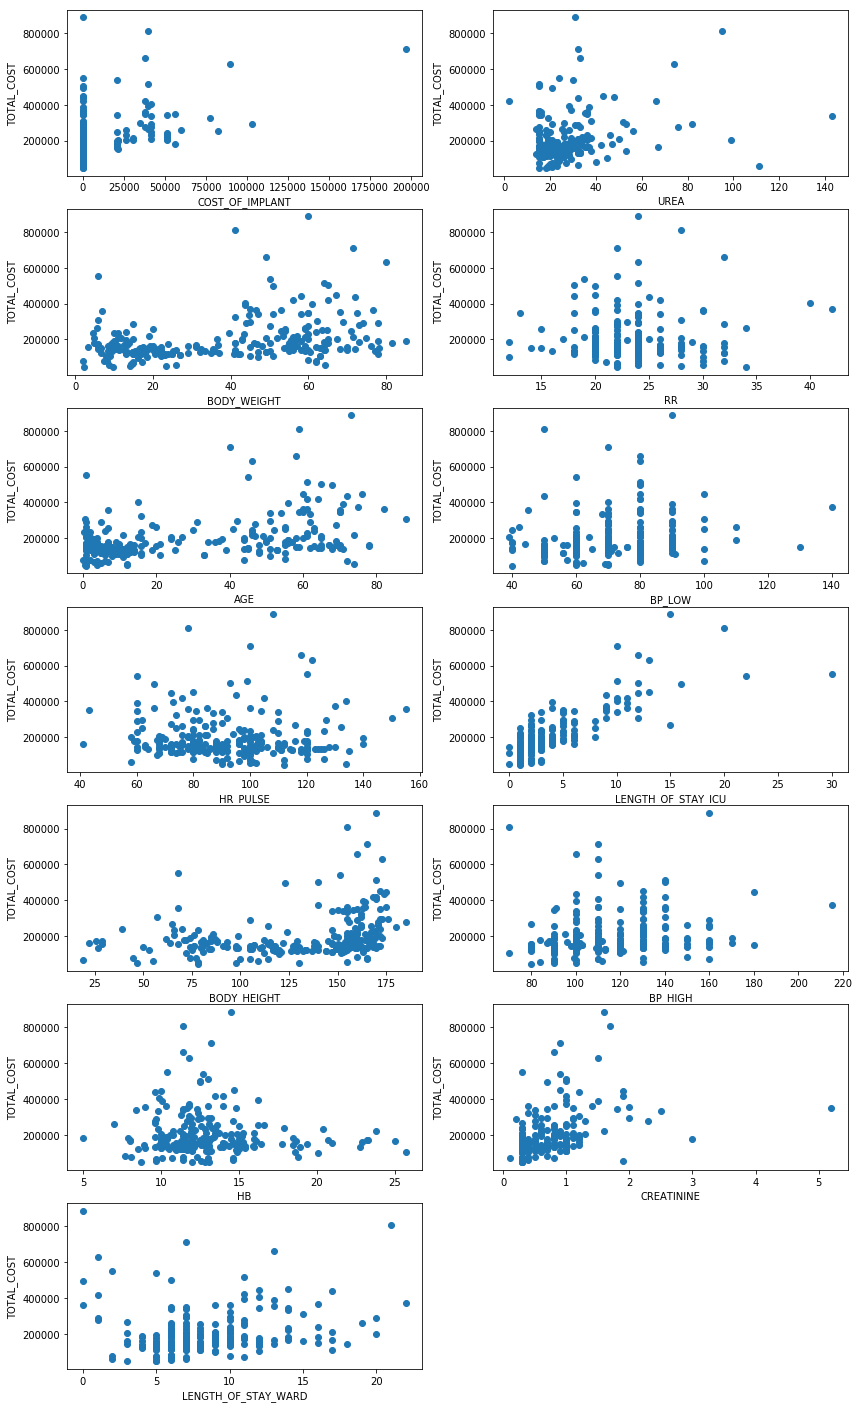

In [10]:
 pyplot.figure(figsize(14, 25))
plot_number = 0
for feature_name in numeric_cols:
        plot_number += 1
        pyplot.subplot(7, 2, plot_number)
        pyplot.scatter(data[feature_name], data['TOTAL_COST_TO_HOSPITAL'].values)
        pyplot.xlabel(feature_name)
        pyplot.ylabel('TOTAL_COST')

In [11]:
# fill numerical na with zero - no effect on label
X_num=X[numeric_cols].fillna(0)
# fill categorical na with 'NA' as new category without loosing the information
X_cat=X[categorical_cols].fillna('NA', axis = 0).applymap(str)

In [12]:
# scale the sample
from sklearn.preprocessing import StandardScaler as SS

scaler = SS()
scaler.fit(X_num, y)

X_num_scaled=scaler.transform(X_num)

/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


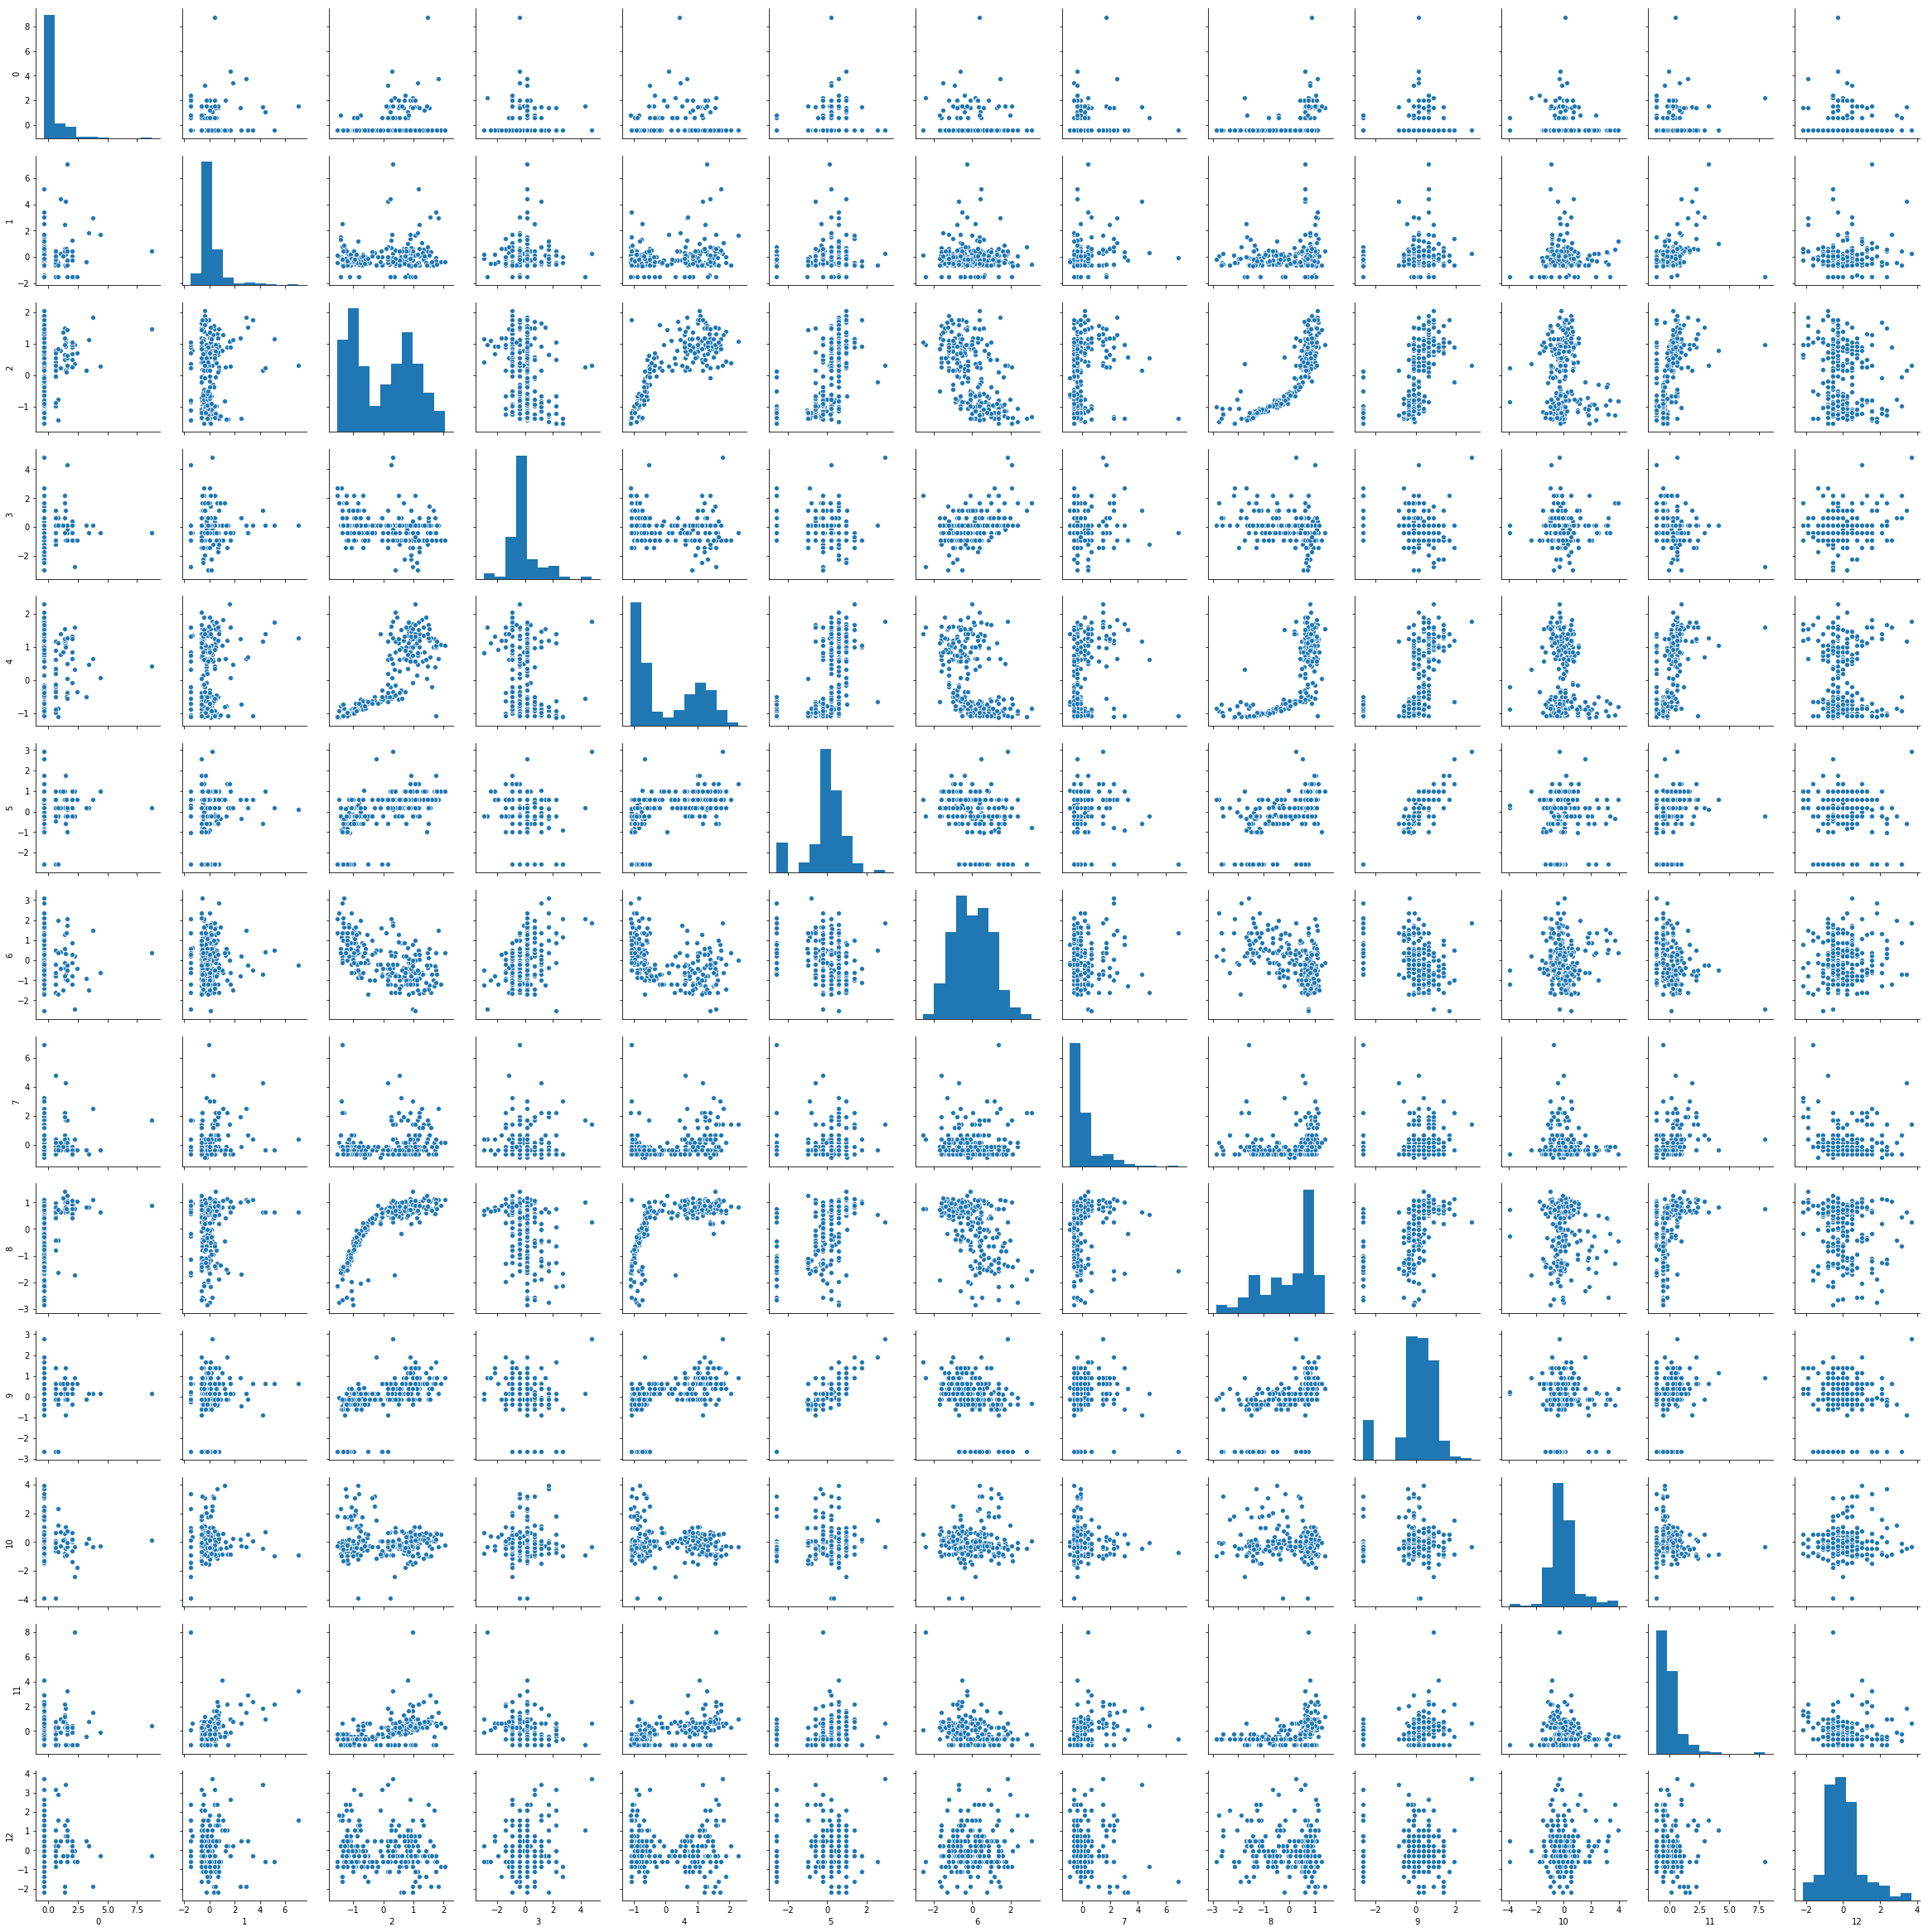

In [19]:
import seaborn as sns
sns.pairplot(pd.DataFrame(X_num_scaled))
# we observe multycollinearity and asymmetry

In [13]:
# transform categorical factors to dummy variables
X_cat_d = pd.get_dummies(X_cat.apply(lambda x: x.astype(str).str.upper()), drop_first = True)

In [14]:
# Descriptive Statistics of categorical data
X_cat_d.describe()

,GENDER_M,MARITAL_STATUS_UNMARRIED,KEY_COMPLAINTS_CODE_CAD-DVD,KEY_COMPLAINTS_CODE_CAD-SVD,KEY_COMPLAINTS_CODE_CAD-TVD,KEY_COMPLAINTS_CODE_CAD-VSD,KEY_COMPLAINTS_CODE_NA,KEY_COMPLAINTS_CODE_OS-ASD,KEY_COMPLAINTS_CODE_OTHER- HEART,KEY_COMPLAINTS_CODE_OTHER- RESPIRATORY,...,PAST_MEDICAL_HISTORY_CODE_DIABETES2,PAST_MEDICAL_HISTORY_CODE_HYPERTENSION1,PAST_MEDICAL_HISTORY_CODE_HYPERTENSION2,PAST_MEDICAL_HISTORY_CODE_HYPERTENSION3,PAST_MEDICAL_HISTORY_CODE_NA,PAST_MEDICAL_HISTORY_CODE_OTHER,MODE_OF_ARRIVAL_TRANSFERRED,MODE_OF_ARRIVAL_WALKED IN,STATE_AT_THE_TIME_OF_ARRIVAL_CONFUSED,TYPE_OF_ADMSN_EMERGENCY
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,...,248.00000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,0.669355,0.564516,0.108871,0.008065,0.096774,0.004032,0.145161,0.060484,0.221774,0.060484,...,0.03629,0.092742,0.052419,0.020161,0.697581,0.060484,0.016129,0.862903,0.004032,0.129032
std,0.471397,0.496823,0.312107,0.089621,0.296248,0.063500,0.352976,0.238863,0.416280,0.238863,...,0.18739,0.290657,0.223322,0.140836,0.460235,0.238863,0.126227,0.344645,0.063500,0.335914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# Correlation of categorical data with labels
# pd = pd.DataFrame(data=X_cat_oh, index=range(0,X_cat_oh.shape[0]), columns=range(0,X_cat_oh.shape[1]))
# pd.corrwith(data['TOTAL_COST_TO_HOSPITAL'])
X_cat_d.corrwith(data['TOTAL_COST_TO_HOSPITAL'])

GENDER_M                                   0.152880
MARITAL_STATUS_UNMARRIED                  -0.375130
KEY_COMPLAINTS_CODE_CAD-DVD                0.318524
KEY_COMPLAINTS_CODE_CAD-SVD                0.051958
KEY_COMPLAINTS_CODE_CAD-TVD                0.213479
KEY_COMPLAINTS_CODE_CAD-VSD               -0.030258
KEY_COMPLAINTS_CODE_NA                    -0.180963
KEY_COMPLAINTS_CODE_OS-ASD                -0.119423
KEY_COMPLAINTS_CODE_OTHER- HEART          -0.041383
KEY_COMPLAINTS_CODE_OTHER- RESPIRATORY    -0.094289
KEY_COMPLAINTS_CODE_OTHER-GENERAL         -0.074289
KEY_COMPLAINTS_CODE_OTHER-NERVOUS         -0.036708
KEY_COMPLAINTS_CODE_OTHER-TERTALOGY       -0.070799
KEY_COMPLAINTS_CODE_PM-VSD                -0.069586
KEY_COMPLAINTS_CODE_RHD                    0.158574
PAST_MEDICAL_HISTORY_CODE_DIABETES2        0.309591
PAST_MEDICAL_HISTORY_CODE_HYPERTENSION1    0.165480
PAST_MEDICAL_HISTORY_CODE_HYPERTENSION2   -0.093824
PAST_MEDICAL_HISTORY_CODE_HYPERTENSION3    0.049972
PAST_MEDICAL

In [16]:
# Correlation matrix of categorical data
X_cat_d.corr()

,GENDER_M,MARITAL_STATUS_UNMARRIED,KEY_COMPLAINTS_CODE_CAD-DVD,KEY_COMPLAINTS_CODE_CAD-SVD,KEY_COMPLAINTS_CODE_CAD-TVD,KEY_COMPLAINTS_CODE_CAD-VSD,KEY_COMPLAINTS_CODE_NA,KEY_COMPLAINTS_CODE_OS-ASD,KEY_COMPLAINTS_CODE_OTHER- HEART,KEY_COMPLAINTS_CODE_OTHER- RESPIRATORY,...,PAST_MEDICAL_HISTORY_CODE_DIABETES2,PAST_MEDICAL_HISTORY_CODE_HYPERTENSION1,PAST_MEDICAL_HISTORY_CODE_HYPERTENSION2,PAST_MEDICAL_HISTORY_CODE_HYPERTENSION3,PAST_MEDICAL_HISTORY_CODE_NA,PAST_MEDICAL_HISTORY_CODE_OTHER,MODE_OF_ARRIVAL_TRANSFERRED,MODE_OF_ARRIVAL_WALKED IN,STATE_AT_THE_TIME_OF_ARRIVAL_CONFUSED,TYPE_OF_ADMSN_EMERGENCY
GENDER_M,1.000000,-0.167849,0.163109,0.063372,0.201066,0.044720,0.070640,-0.073361,-0.119962,-0.001450,...,0.090556,0.165615,0.011475,-0.021147,-0.182849,0.034506,-0.046092,-0.080788,0.044720,0.117116
MARITAL_STATUS_UNMARRIED,-0.167849,1.000000,-0.345740,-0.102660,-0.372678,0.055886,-0.053620,0.154620,0.175233,0.188736,...,-0.220940,-0.364020,-0.121828,-0.105457,0.430943,0.154620,-0.016660,0.359243,-0.072444,-0.389710
KEY_COMPLAINTS_CODE_CAD-DVD,0.163109,-0.345740,1.000000,-0.031516,-0.114411,-0.022240,-0.144035,-0.088686,-0.186590,-0.088686,...,0.070619,0.289909,0.092047,0.041967,-0.361747,-0.088686,-0.044753,-0.274697,-0.022240,0.328862
KEY_COMPLAINTS_CODE_CAD-SVD,0.063372,-0.102660,-0.031516,1.000000,-0.029514,-0.005737,-0.037156,-0.022878,-0.048134,-0.022878,...,-0.017497,0.282017,-0.021207,-0.012934,-0.136943,-0.022878,-0.011545,0.035940,-0.005737,-0.034705
KEY_COMPLAINTS_CODE_CAD-TVD,0.201066,-0.372678,-0.114411,-0.029514,1.000000,-0.020827,-0.134885,-0.083052,-0.174737,-0.083052,...,0.446986,0.083420,0.045403,-0.046953,-0.289277,-0.025838,-0.041910,-0.107447,-0.020827,0.158798
KEY_COMPLAINTS_CODE_CAD-VSD,0.044720,0.055886,-0.022240,-0.005737,-0.020827,1.000000,-0.026220,-0.016144,-0.033967,-0.016144,...,-0.012347,-0.020343,-0.014965,-0.009127,0.041895,-0.016144,-0.008147,0.025362,-0.004049,-0.024491
KEY_COMPLAINTS_CODE_NA,0.070640,-0.053620,-0.144035,-0.037156,-0.134885,-0.026220,1.000000,-0.104556,-0.219981,-0.104556,...,-0.079966,0.026096,0.108519,0.103772,-0.002814,-0.056538,0.128973,-0.068708,-0.026220,0.012116
KEY_COMPLAINTS_CODE_OS-ASD,-0.073361,0.154620,-0.088686,-0.022878,-0.083052,-0.016144,-0.104556,1.000000,-0.135447,-0.064378,...,-0.049237,-0.081122,-0.059677,-0.036396,0.167061,-0.064378,-0.032486,0.101135,-0.016144,-0.097660
KEY_COMPLAINTS_CODE_OTHER- HEART,-0.119962,0.175233,-0.186590,-0.048134,-0.174737,-0.033967,-0.219981,-0.135447,1.000000,-0.135447,...,-0.103592,-0.103756,-0.082007,0.061538,0.119037,0.068134,-0.068350,0.099905,0.119192,-0.089660
KEY_COMPLAINTS_CODE_OTHER- RESPIRATORY,-0.001450,0.188736,-0.088686,-0.022878,-0.083052,-0.016144,-0.104556,-0.064378,-0.135447,1.000000,...,-0.049237,-0.081122,0.016220,-0.036396,0.130233,-0.064378,0.101791,0.051955,-0.016144,-0.097660


In [17]:
# preprocessed X
X_p = np.hstack((X_num_scaled, X_cat_d))

In [18]:
# split the data on train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_p, y, test_size=0.3, random_state=0)

# Modeling

In [19]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, LinearRegression, SGDRegressor
from sklearn import metrics

In [20]:
# Linear model with L1 regularization
lasso_regressor = Lasso()
lasso_regressor.fit(X_train, y_train)
lasso_predictions = lasso_regressor.predict(X_test)
print 'mean squared error', metrics.mean_squared_error(y_test, lasso_predictions)
print 'R2 train', lasso_regressor.score(X_train, y_train)
print 'R2 test', metrics.r2_score(y_test, lasso_predictions)

mean squared error 1413836286.9904923
R2 train 0.8666239171884941
R2 test 0.8824624901127146


/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:474: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


best alpha_: 243


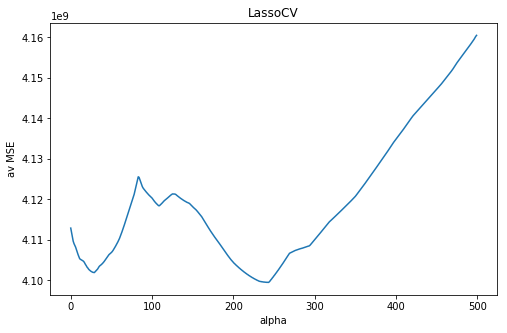

In [21]:
# define the best alpha for Lasso
alphas = np.arange(0, 500, 1)
lassocv_regressor = LassoCV(alphas=alphas)
lassocv_regressor.fit(X_p, y)
mse_path = lassocv_regressor.mse_path_
regressor_alphas = lassocv_regressor.alphas_
mse_results = [np.mean(row) for row in mse_path]

plt.figure(figsize=(8, 5))
plt.plot(regressor_alphas, mse_results)
plt.xlabel("alpha")
plt.ylabel("av MSE")
plt.title("LassoCV")

print("best alpha_: {}".format(lassocv_regressor.alpha_))

In [22]:
# Linear model with L1 regularization and with the best alpha and worse R2
lassa_regressor = Lasso(alpha = lassocv_regressor.alpha_)
lassa_regressor.fit(X_train, y_train)
lassa_predictions = lassa_regressor.predict(X_test)
print 'mean squared error', metrics.mean_squared_error(y_test, lassa_predictions)
print 'R2 train', lassa_regressor.score(X_train, y_train)
print 'R2 test', metrics.r2_score(y_test, lassa_predictions)

mean squared error 1425985906.7127764
R2 train 0.8632833393797843
R2 test 0.8814524466859226


In [23]:
# Ordinary linear model
lr_regressor = LinearRegression()
lr_regressor.fit(X_train, y_train)
lr_predictions = lr_regressor.predict(X_test)
print 'mean squared error', metrics.mean_squared_error(y_test, lr_predictions)
print 'R2 train', lr_regressor.score(X_train, y_train)
print 'R2 test', metrics.r2_score(y_test, lr_predictions)

mean squared error 1413978478.8841074
R2 train 0.8666242835455609
R2 test 0.8824506691676339


In [24]:
# Linear model with L2 regularization
ridge_regressor = Ridge()
ridge_regressor.fit(X_train, y_train)
ridge_predictions = ridge_regressor.predict(X_test)
print 'mean squared error', metrics.mean_squared_error(y_test, ridge_predictions)
print 'R2 train', ridge_regressor.score(X_train, y_train)
print 'R2 test', metrics.r2_score(y_test, ridge_predictions)

mean squared error 1426587173.288631
R2 train 0.8649151811423367
R2 test 0.8814024611418009


In [25]:
# SGD linear model
SGD_regressor = SGDRegressor(random_state = 1, n_iter = 20)
SGD_regressor.fit(X_train, y_train)
SGD_predictions = SGD_regressor.predict(X_test)
print 'mean squared error', metrics.mean_squared_error(y_test, SGD_predictions)
print 'R2 train', SGD_regressor.score(X_train, y_train)
print 'R2 test', metrics.r2_score(y_test, SGD_predictions)

mean squared error 2032379135.14017
R2 train 0.8358183326697313
R2 test 0.8310407047199683


/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [26]:
# factors and coefficients in Lasso
list(zip(X[numeric_cols].columns.append(X_cat_d.columns), lasso_regressor.coef_))

[('COST_OF_IMPLANT', 49790.619774755876),
 ('UREA', -5611.518320049849),
 ('BODY_WEIGHT', -14045.926823320366),
 ('RR', 4462.444230961518),
 ('AGE', 10921.838236931695),
 ('BP_LOW', 4762.591574543539),
 ('HR_PULSE', 4741.472440929146),
 ('LENGTH_OF_STAY_ICU', 86149.27593544242),
 ('BODY_HEIGHT', 14912.629301786019),
 ('BP_HIGH', 1376.1505785470383),
 ('HB', -1395.3781223575304),
 ('CREATININE', 10492.991124954397),
 ('LENGTH_OF_STAY_WARD', 20834.077997927256),
 ('GENDER_M', 137.83718172210627),
 ('MARITAL_STATUS_UNMARRIED', -4139.402364109292),
 ('KEY_COMPLAINTS_CODE_CAD-DVD', 27125.505937784263),
 ('KEY_COMPLAINTS_CODE_CAD-SVD', 24181.677546352425),
 ('KEY_COMPLAINTS_CODE_CAD-TVD', 18876.757720685437),
 ('KEY_COMPLAINTS_CODE_CAD-VSD', 19470.289186508784),
 ('KEY_COMPLAINTS_CODE_NA', -7090.7437214501915),
 ('KEY_COMPLAINTS_CODE_OS-ASD', 1660.8868219100327),
 ('KEY_COMPLAINTS_CODE_OTHER- HEART', -8957.143055256613),
 ('KEY_COMPLAINTS_CODE_OTHER- RESPIRATORY', 957.8902315074012),
 ('KEY_

In [27]:
# polinomial factors

from sklearn.preprocessing import PolynomialFeatures

transform = PolynomialFeatures(2)

X_train_poly = transform.fit_transform(X_train)
X_test_poly = transform.transform(X_test)

lasso_poly_regressor = Lasso(fit_intercept=False)
lasso_poly_regressor.fit(X_train, y_train)
lasso_poly_predictions = lasso_poly_regressor.predict(X_test)
print 'mean squared error', metrics.mean_squared_error(y_test, lasso_poly_predictions)
print 'R2 train', lasso_poly_regressor.score(X_train, y_train)
print 'R2 test', metrics.r2_score(y_test, lasso_poly_predictions)

mean squared error 2000546337.5699801
R2 train 0.8536461801192539
R2 test 0.8336870844978636


In [28]:
# factors and coefficients in Lasso
list(zip(X[numeric_cols].columns.append(X_cat_d.columns), lassa_regressor.coef_))

[('COST_OF_IMPLANT', 48136.834466885375),
 ('UREA', -4830.738841573879),
 ('BODY_WEIGHT', -8761.19658420201),
 ('RR', 4140.09366032651),
 ('AGE', 9947.611182558747),
 ('BP_LOW', 5503.338621315091),
 ('HR_PULSE', 3964.4660595112778),
 ('LENGTH_OF_STAY_ICU', 87744.88535092231),
 ('BODY_HEIGHT', 12895.301459526005),
 ('BP_HIGH', 0.0),
 ('HB', -364.6157524289378),
 ('CREATININE', 7113.944372100598),
 ('LENGTH_OF_STAY_WARD', 20898.011564885062),
 ('GENDER_M', 1795.0290578760942),
 ('MARITAL_STATUS_UNMARRIED', -0.0),
 ('KEY_COMPLAINTS_CODE_CAD-DVD', 15808.99992816747),
 ('KEY_COMPLAINTS_CODE_CAD-SVD', 0.0),
 ('KEY_COMPLAINTS_CODE_CAD-TVD', 10326.312411808422),
 ('KEY_COMPLAINTS_CODE_CAD-VSD', 0.0),
 ('KEY_COMPLAINTS_CODE_NA', -7414.633884237035),
 ('KEY_COMPLAINTS_CODE_OS-ASD', 0.0),
 ('KEY_COMPLAINTS_CODE_OTHER- HEART', -9262.28335730003),
 ('KEY_COMPLAINTS_CODE_OTHER- RESPIRATORY', -0.0),
 ('KEY_COMPLAINTS_CODE_OTHER-GENERAL', -18587.49542632746),
 ('KEY_COMPLAINTS_CODE_OTHER-NERVOUS', -0.

In [40]:
lassa_regressor.intercept_

198869.4280828914

In [39]:
from operator import itemgetter
sorted(list(zip(X[numeric_cols].columns.append(X_cat_d.columns), abs(lassa_regressor.coef_), lassa_regressor.coef_)), key = itemgetter(1), reverse = True)

[('LENGTH_OF_STAY_ICU', 87744.88535092231, 87744.88535092231),
 ('PAST_MEDICAL_HISTORY_CODE_DIABETES2', 62635.08708335628, 62635.08708335628),
 ('COST_OF_IMPLANT', 48136.834466885375, 48136.834466885375),
 ('KEY_COMPLAINTS_CODE_OTHER-TERTALOGY',
  27112.059538970854,
  27112.059538970854),
 ('LENGTH_OF_STAY_WARD', 20898.011564885062, 20898.011564885062),
 ('KEY_COMPLAINTS_CODE_OTHER-GENERAL', 18587.49542632746, -18587.49542632746),
 ('TYPE_OF_ADMSN_EMERGENCY', 17964.330980863444, -17964.330980863444),
 ('KEY_COMPLAINTS_CODE_CAD-DVD', 15808.99992816747, 15808.99992816747),
 ('KEY_COMPLAINTS_CODE_RHD', 14783.620477718947, -14783.620477718947),
 ('BODY_HEIGHT', 12895.301459526005, 12895.301459526005),
 ('PAST_MEDICAL_HISTORY_CODE_OTHER', 11245.99102542442, -11245.99102542442),
 ('KEY_COMPLAINTS_CODE_CAD-TVD', 10326.312411808422, 10326.312411808422),
 ('AGE', 9947.611182558747, 9947.611182558747),
 ('KEY_COMPLAINTS_CODE_OTHER- HEART', 9262.28335730003, -9262.28335730003),
 ('BODY_WEIGHT', 